# Parametric Resonance
I intend to understand the analytical and numerical solutions of a parametrically driven oscillator.

$$ \ddot{x} + \frac{\omega_0}{Q} \dot{x} + \omega_0^2 (1 + 2 \alpha \cos(\omega t)) x = f(t) $$

where $\omega_0$ is the natural frequency, $Q$ is the quality factor, $\alpha$ controls the strength of parametric driving, $\omega$ is the frequency for parametric driving and $f(t)$ is an external drive

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate
import numpy.fft

In [28]:
# y = [x x_dot]
def dy_dt(y,t,params):
    '''
        dy_dt = [x_dot x_ddot]
        where x_ddot = -omega_0/Q x_dot + omega_0**2 * (1 + 2 alpha cos(omega t)) x + f(t)
    '''
    alpha = params['alpha']
    omega_0 = params['omega_0']
    omega = params['omega']
    Q = params['Q']
    # Note: f is a function passed through the params dict
    f = params['f']
    
    y_dot = np.zeros(2)
    y_dot[0] = y[1]
    y_dot[1] = -omega_0/Q * y[1] - omega_0**2 * (1 + 2*alpha*np.cos(omega*t)) * y[0] + f(t)
    return y_dot

def f(t):
    return 0.0 

In [180]:
params = {
    'omega_0' : 1,
    'Q' : 100,
    'alpha' : 1e-1,
    'omega' : 2.0,
    'f' : f,
}

y_0 = np.array([1,0])
t_vec = np.linspace(0,50*2*np.pi/params['omega_0'],1000)
sample_interval = (t_vec[1] - t_vec[0])/(2*np.pi/params['omega_0'])
res = scipy.integrate.odeint(dy_dt,y_0,t_vec,(params,))

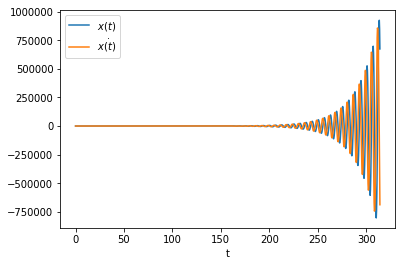

In [181]:
plt.plot(t_vec,res[:,0],label=r"$x(t)$")
plt.plot(t_vec,res[:,1],label=r"$\dot{x(t)}$")
plt.xlabel("t")
plt.legend()

Text(0,0.5,'Fourier amplitude (arb. units)')

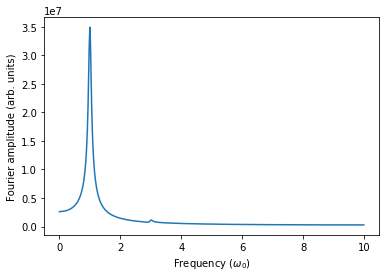

In [182]:
fft = numpy.fft.rfft(res[:,0])
freq = numpy.fft.rfftfreq(t_vec.shape[-1],sample_interval)
mag = np.abs(fft)
plt.plot(freq,mag,'-')
plt.xlabel("Frequency ($\omega_0$)")
plt.ylabel("Fourier amplitude (arb. units)")

## Understanding pumping
What happens if I apply a pump drive to the resonance?

In [140]:
def f_pump(t,omega,amp):
    # retuns a square wave signal with period 2*np.pi/omega and amplitude amp
    return amp*np.sign(np.sin(omega* t))

Text(0.5,0,'t')

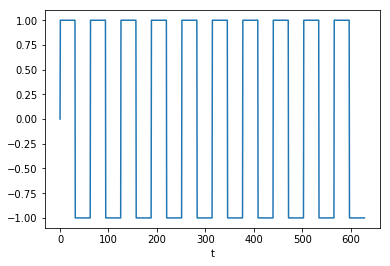

In [141]:
# test of square wave function
omega = 0.1
t_vec = np.linspace(0,10*2*np.pi/omega,1000)
plt.plot(t_vec,f_pump(t_vec,omega,1))
plt.xlabel("t")

In [200]:
# pump frequency
pump_omega = 0.1
pump_amp = 1

params = {
    'omega_0' : 1,
    'Q' : 100,
    'alpha' : 1e-1,
    'omega' : 2.2,
    'f' : lambda t : f_pump(t,pump_omega,pump_amp),
}

y_0 = np.array([1,0])
t_vec = np.linspace(0,100*2*np.pi/params['omega_0'],1000)
sample_interval = (t_vec[1] - t_vec[0])/(2*np.pi/params['omega_0'])
res = scipy.integrate.odeint(dy_dt,y_0,t_vec,(params,))

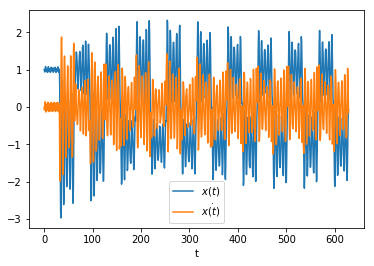

In [201]:
plt.plot(t_vec,res[:,0],label=r"$x(t)$")
plt.plot(t_vec,res[:,1],label=r"$\dot{x(t)}$")
plt.xlabel("t")
plt.legend()

Text(0,0.5,'Fourier amplitude (arb. units)')

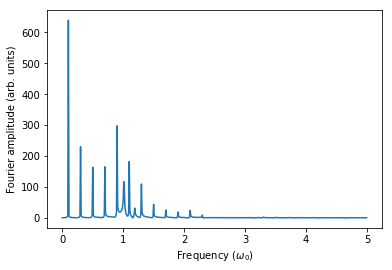

In [202]:
fft = numpy.fft.rfft(res[:,0])
freq = numpy.fft.rfftfreq(t_vec.shape[-1],sample_interval)
mag = np.abs(fft)
plt.plot(freq,mag,'-')
plt.xlabel("Frequency ($\omega_0$)")
plt.ylabel("Fourier amplitude (arb. units)")